# Practicing Statistics - Titanic Project

This <b> notebook </b> is intended to provide a space to practice statistical and probabilistic ideas, using an example such as the [Titanic](https://www.kaggle.com/c/titanic) Project from Kaggle.

### Data Dictionary

| Variable | Definition| Key |
| :- | :- | :- |
| survival |Survival | 0 = No, 1 = Yes |
| pclass | Ticket class |1 = 1st, 2 = 2nd, 3 = 3rd |
|sex | Sex | |
| Age | Age in years | |	
| sibsp | # of siblings / spouses aboard the Titanic |
| parch | # of parents / children aboard the Titanic |	
| ticket | Ticket number |
| fare | Passenger fare |
| cabin | Cabin number |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes

<b>pclass:</b> A proxy for socio-economic status (SES) <br>
1st = Upper <br>
2nd = Middle <br>
3rd = Lower

<b>age:</b> Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

<b>sibsp:</b> The dataset defines family relations in this way... <br>
Sibling = brother, sister, stepbrother, stepsister <br>
Spouse = husband, wife (mistresses and fiancés were ignored)

<b>parch:</b> The dataset defines family relations in this way... <br>
Parent = mother, father <br>
Child = daughter, son, stepdaughter, stepson <br>
Some children travelled only with a nanny, therefore parch=0 for them.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Data-Dictionary" data-toc-modified-id="Data-Dictionary-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Data Dictionary</a></span></li><li><span><a href="#Variable-Notes" data-toc-modified-id="Variable-Notes-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Variable Notes</a></span></li></ul></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import Data</a></span></li><li><span><a href="#Initial-Checks" data-toc-modified-id="Initial-Checks-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Initial Checks</a></span></li><li><span><a href="#First-Questions-and-Assumptions" data-toc-modified-id="First-Questions-and-Assumptions-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>First Questions and Assumptions</a></span><ul class="toc-item"><li><span><a href="#Questions" data-toc-modified-id="Questions-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Questions</a></span></li><li><span><a href="#Assumptions" data-toc-modified-id="Assumptions-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Assumptions</a></span></li></ul></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Data-Types" data-toc-modified-id="Data-Types-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Types</a></span></li><li><span><a href="#Estimates-of-Variability" data-toc-modified-id="Estimates-of-Variability-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Estimates of Variability</a></span></li><li><span><a href="#Exploring-the-Data-Distribution" data-toc-modified-id="Exploring-the-Data-Distribution-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Exploring the Data Distribution</a></span></li></ul></li></ul></div>

## Introduction

### Import Packages

In [83]:
import os
import pandas as pd # DataFrame = tables, data manipulation, data cleaning
import numpy as np # Numerical Analysis
import matplotlib as mlt # visualisation
import seaborn as sns # fancy visualisation
import sklearn.ensemble as svm # data science package, categorical naming, predictionc modeling
from statsmodels import robust
import missingno

### Import Data

In [84]:
os.getcwd()

'C:\\Users\\mevans02\\OneDrive - FactSet\\Documents\\Kaggle\\Titanic'

In [85]:
train = pd.read_csv('C:/Users/mevans02/OneDrive - FactSet/Documents/Kaggle/Titanic/Inputs/train.csv', index_col = 'PassengerId')
test = pd.read_csv('C:/Users/mevans02/OneDrive - FactSet/Documents/Kaggle/Titanic/Inputs/test.csv', index_col = 'PassengerId')

### Initial Checks

In [86]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
train.shape

(891, 11)

In [88]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:>

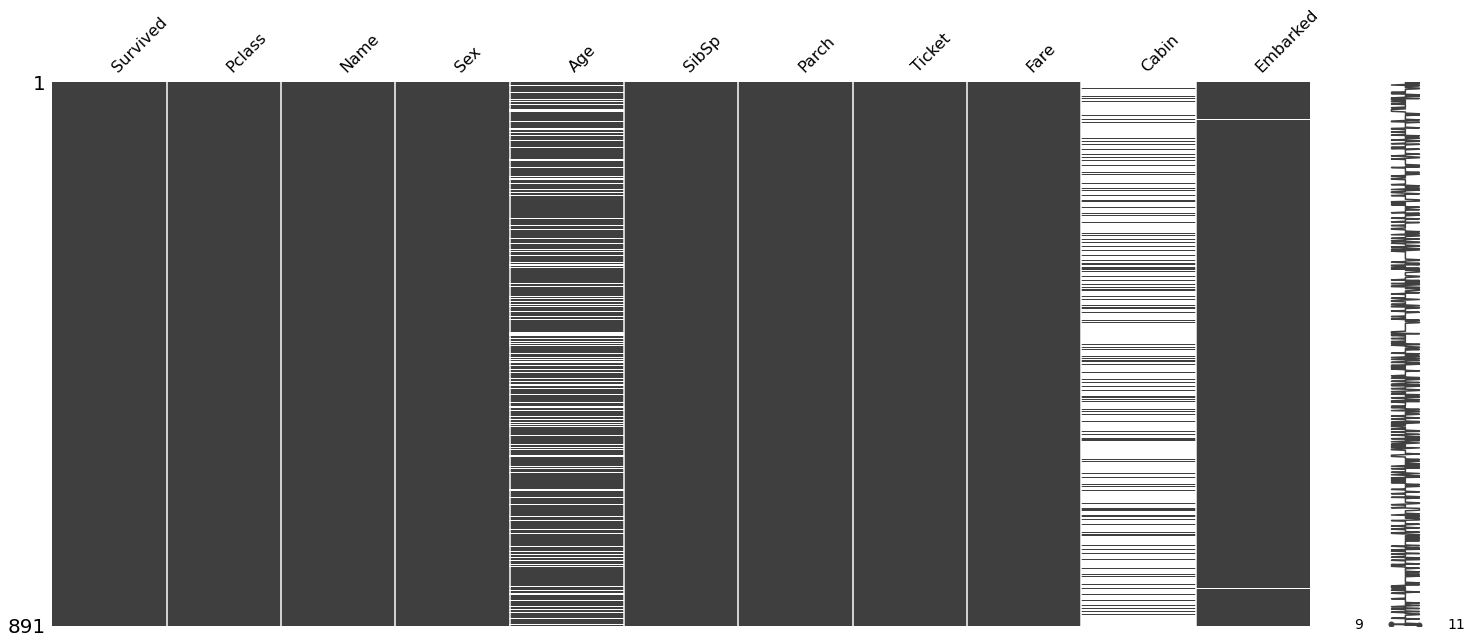

In [90]:
missingno.matrix(train)

### First Questions and Assumptions

#### Questions
- For parch, does "Parent = mother, father" also include step-father/mother? (seems not as children includes step-son/daughter)

#### Assumptions
- we will assume that a child is determined as someone under the age of 18

## Exploratory Data Analysis

### Data Types

First we need to identify the different data types that we have. The main two types are <b> Numeric </b> (Data expressed on the numeric scale) and <b> Categorical </b> (Data that can be grouped into specific distinct possible catgories). Within these two types we can also split up the following way:

Numeric:
- Continous (can take any value in an interval)
- Discrete (only integer values such as count)

Categorical
- Binary (Boolean category - True/False, 1/0)
- Ordinal (order to the categories)
- Nominal (no order)

In [91]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [92]:
# Splitting Numeric and Categorical data
numeric_dist = train.select_dtypes(include=['int64']) # distinct numeric
numeric_cont = train.select_dtypes(include=['float64']) # continous numeric
categorical = train.select_dtypes(include=['object']).drop(columns='Cabin') # categorical

### Estimates of Variability

Are the data values tightly packed together? Or do they vary widely? It is important to distinguish what is random chance and what could be due to real variability in the data.

The two most common variability measures are standard deviation and mean absolute deviation - one draw back to these measurements is that they are not robust (<b> robust = not sensitive to extreme values </b>), meaning very large or very small values can have a large impact. Another measurement which is robust would be MAD (Median Absolute Deviation).

$$\text{Mean absolute deviation} = \frac{\sum \limits_{i=1} ^{n} \lvert{x_i - \bar{x}}\rvert}{n}$$ 


$$\text{Variance} = s^2 = \frac{\sum \limits_{i=1} ^{n} \left(x_i - \bar{x}\right)}{n-1}$$

$$\text{standard deviation} = s = \sqrt{Variance}$$


$$\text{MAD}= Median\left(\lvert{x_1 - m}\rvert,\lvert{x_2 - m}\rvert, ...,\lvert{x_N - m}\rvert\right)$$

Thankfully the <b>pandas</b> package has built in methods for calculating these measures. We will test one of our numerical features: <b> Age </b>, which has some missing data. In pandas, std and quantile ignore NA's, so we can create a new dataset with just the available ages.

In [93]:
# standard deviation, IQR and MAD (Median Absolute Deviation)

age_avail = train['Age'][train['Age'].isnull()==False] #non-missing age values

print(f'std of age (excl. NA) is: {age_avail.std()}')
print(f'IQR of age (excl. NA) is: {age_avail.quantile(0.75) - age_avail.quantile(0.25)}')
print(f'MAD of age (excl. NA) is: {robust.scale.mad(age_avail)}')

std of age (excl. NA) is: 14.526497332334044
IQR of age (excl. NA) is: 17.875
MAD of age (excl. NA) is: 13.343419966550417


The fact that std and MAD are so close for <b> Age </b> means that this feature is less likely to have extreme values. But we can also view the distribution visually:

<AxesSubplot:xlabel='Age', ylabel='Count'>

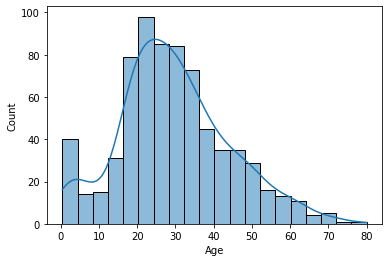

In [94]:
sns.histplot(train.Age, kde=True)

In [95]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='Age'>

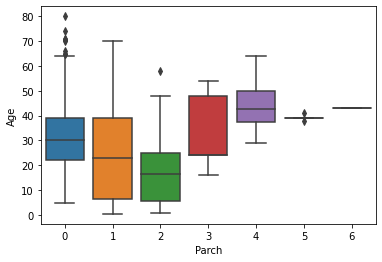

In [96]:
sns.boxplot(y=train.Age, x=train.Parch)

In [97]:
train[['Age','Sex','Parch','SibSp']][train['Parch'] == 3]

,Age,Sex,Parch,SibSp
PassengerId,,,,
87,16.0,male,3,1
438,24.0,female,3,2
737,48.0,female,3,1
775,54.0,female,3,1
859,24.0,female,3,0


In [108]:
train_copy = train.copy()

train_copy['who'] = np.where(train_copy['Age'] < 18, 'child', train_copy['Sex'])

di = {1: "First", 2: "Second", 3: "Third"}
train_copy['class'] = train_copy['Pclass'].map(di)
train_copy.sort_values('class')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,who,class
PassengerId,,,,,,,,,,,,,
446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S,child,First
311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C,female,First
310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,female,First
308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C,child,First
307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C,female,First
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.7750,NaN,S,male,Third
382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C,child,Third
383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,male,Third


In [109]:
train_copy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,who,class
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Third
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,First
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Third
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,First
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Third


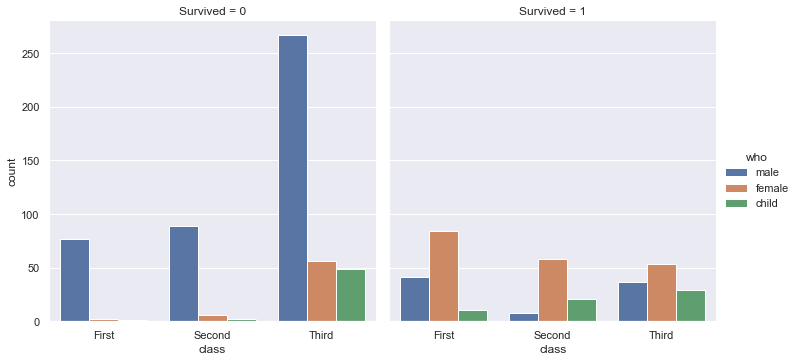

In [113]:
sns.set_theme(style='darkgrid')
sns.catplot(x = 'class', hue = 'who', col = 'Survived', order = ['First', 'Second', 'Third'], data = train_copy, kind = 'count')

### Exploring the Data Distribution